# **Imports:**

In [10]:
import torchvision as tv
from torch.utils.data import DataLoader
import torch.utils.data
import random
import numpy as np
import torchvision.transforms as transforms
from numpy import linalg as la
import torch.nn as nn


# **Neural Network Class:**

In [11]:

class Network(nn.Module):
    def __init__(self, input_size,num_classes,dropout):
        super(Network,self).__init__()
        self.fc1 = nn.Linear(input_size, num_classes)
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self,x):
        out = self.dropout(x)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.softmax(out)
        return out

# **Training and Validation Process:**

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"

batch_size = 32
num_epochs = 200
learning_rate = 1e-4
num_classes = 10
num_features = 784
train50Len = 30000
val50Len = 5000


device = "cuda" if torch.cuda.is_available() else "cpu"
transform = transforms.Compose(
[transforms.ToTensor(),
]
)

train = tv.datasets.MNIST('../data',transform = transform, download=True,train=True)
val = tv.datasets.MNIST('../data',transform = transform, download=True,train=False)



My_list = [*range(0, 60000, 1)]
My_list1 = [*range(0, 10000, 1)]

strain = torch.utils.data.Subset(train, random.sample(My_list, train50Len))
sval = torch.utils.data.Subset(val, random.sample(My_list1, val50Len))



netlayers = Network(num_features, num_classes,dropout=0.25)
if torch.cuda.is_available():
    netlayers.to(device)

loss_function = nn.NLLLoss()
optimizer = torch.optim.Adam(netlayers.parameters(), lr=learning_rate)



train_loader = torch.utils.data.DataLoader(strain, batch_size=batch_size,
                                            shuffle=True)
val_loader = torch.utils.data.DataLoader(sval, batch_size=batch_size,
                                            shuffle=True)

loss = []
valloss = []
trainingacc = []
validationacc = []
AllBatchTrainLoss = []
AllBatchValLoss = []
batchtrainingacc = []
batchvalidationacc = []

for epoch in range(num_epochs):
    print("Epoch: ",epoch+1 )
    train_accuracy = 0
    test_accuracy = 0
    epochtrainloss = []
    epochtestloss = []
    netlayers.train()
    for i ,(images,labels) in enumerate(train_loader):
            images = images.view(-1,28*28).to(device) 
            labels = labels.to(device)
            optimizer.zero_grad()
            outputs = netlayers(images)
#           print(outputs.shape," ",labels.shape)
            Tloss = loss_function(outputs, labels)
            epochtrainloss.append(Tloss.cpu().item())
            AllBatchTrainLoss.append(Tloss.cpu().item())
            _, predicted = torch.max(outputs,1)     
            train_accuracy += np.count_nonzero(predicted.cpu().data.numpy() == labels.cpu().data.numpy())
            batchtrainingacc.append((np.count_nonzero(predicted.cpu().data.numpy() == labels.cpu().data.numpy())) * 100)
            Tloss.backward()
            optimizer.step()   
    loss.append(np.mean(epochtrainloss))
    trainingacc.append((train_accuracy/train50Len) *100)
    print("Train Accuracy:",(train_accuracy/train50Len) *100)
    netlayers.eval()
    for i ,(images,labels) in enumerate(val_loader):
            images = images.view(-1,28*28).to(device)
            labels = labels.to(device)
            outputs = netlayers(images)
            validloss = loss_function(outputs, labels)
            epochtestloss.append(validloss.cpu().item())
            AllBatchValLoss.append(validloss.cpu().item())
            _, predicted = torch.max(outputs,1)     
            test_accuracy += np.count_nonzero(predicted.cpu().data.numpy() == labels.cpu().data.numpy())
            batchvalidationacc.append((np.count_nonzero(predicted.cpu().data.numpy() == labels.cpu().data.numpy())) * 100)
    valloss.append(np.mean(epochtestloss))
    validationacc.append((test_accuracy/val50Len) *100)
    print("Test Accuracy:",(test_accuracy/val50Len) *100)

Epoch:  1
Train Accuracy: 63.06666666666667
Test Accuracy: 83.67999999999999
Epoch:  2
Train Accuracy: 83.2
Test Accuracy: 85.84
Epoch:  3
Train Accuracy: 85.47333333333333
Test Accuracy: 87.6
Epoch:  4
Train Accuracy: 86.82333333333332
Test Accuracy: 88.52
Epoch:  5
Train Accuracy: 87.51666666666667
Test Accuracy: 89.42
Epoch:  6
Train Accuracy: 87.91333333333333
Test Accuracy: 89.64
Epoch:  7
Train Accuracy: 88.53999999999999
Test Accuracy: 90.24
Epoch:  8
Train Accuracy: 88.75666666666666
Test Accuracy: 90.53999999999999
Epoch:  9
Train Accuracy: 89.08
Test Accuracy: 90.64
Epoch:  10
Train Accuracy: 89.26666666666667
Test Accuracy: 90.78
Epoch:  11
Train Accuracy: 89.57000000000001
Test Accuracy: 90.92
Epoch:  12
Train Accuracy: 89.55333333333333
Test Accuracy: 91.03999999999999
Epoch:  13
Train Accuracy: 89.70333333333333
Test Accuracy: 91.06
Epoch:  14
Train Accuracy: 89.67333333333333
Test Accuracy: 91.24
Epoch:  15
Train Accuracy: 89.9
Test Accuracy: 91.34
Epoch:  16
Train Accur

# **Training/Validation Epochwise Loss:**

Text(0, 0.5, 'Loss')

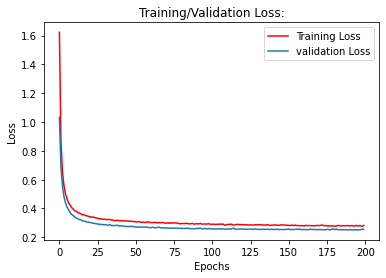

In [13]:
import matplotlib.pyplot as plt
plt.title("Training/Validation Loss:")
plt.plot(loss,color = 'r', label="Training Loss")
plt.plot(valloss,label="validation Loss")
leg = plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Loss")

# **Training/Validation Epochwise Accuracy:**

92.17666666666666
92.84


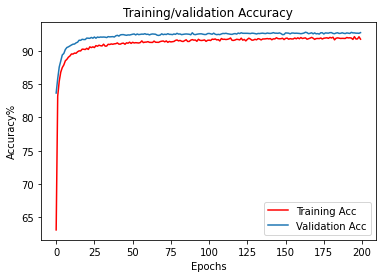

In [14]:
plt.title("Training/validation Accuracy")
plt.plot(trainingacc,color = 'r',label="Training Acc")
plt.plot(validationacc,label="Validation Acc")
leg = plt.legend(loc='lower right')
plt.xlabel("Epochs")
plt.ylabel("Accuracy%")
print(max(trainingacc))
print(max(validationacc))

# **Training/Validation Epochwise Error:**

Final Train accuracy:  92.17666666666666
Final Test accuracy:  92.84


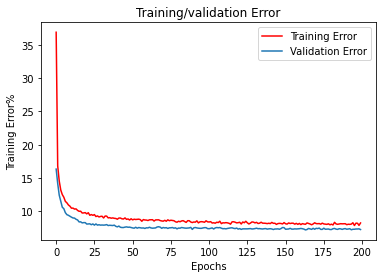

In [15]:
plt.title("Training/validation Error")
plt.plot(100-np.array(trainingacc),color = 'r',label="Training Error")
plt.plot(100-np.array(validationacc),label="Validation Error")
leg = plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Training Error%")
print("Final Train accuracy: ",max(trainingacc))
print("Final Test accuracy: ", max(validationacc))

# **Training/Validation Batchwise Error:**

Text(0, 0.5, 'Error%')

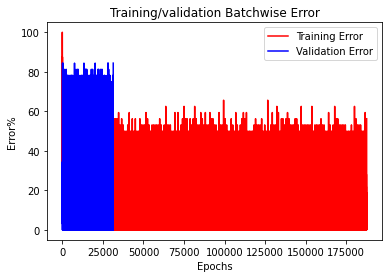

In [16]:
plt.title("Training/validation Batchwise Error")
plt.plot(100-(np.array(batchtrainingacc)/batch_size), color = 'r',label="Training Error")
plt.plot(100-(np.array(batchvalidationacc)/batch_size), color = 'b',label="Validation Error")
leg = plt.legend(loc='upper right')
plt.xlabel("Epochs")
plt.ylabel("Error%")


# **Training/Validation Batchwise Accuracy:**

Text(0, 0.5, 'Acc%')

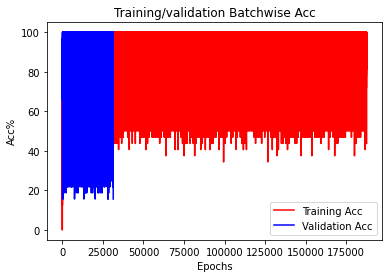

In [17]:
plt.title("Training/validation Batchwise Acc")
plt.plot((np.array(batchtrainingacc)/batch_size), color = 'r',label="Training Acc")
plt.plot((np.array(batchvalidationacc)/batch_size), color = 'b',label="Validation Acc")
leg = plt.legend(loc='lower right')
plt.xlabel("Epochs")
plt.ylabel("Acc%")

# **Training/Validation Batchwise Loss:**

Text(0, 0.5, 'Loss')

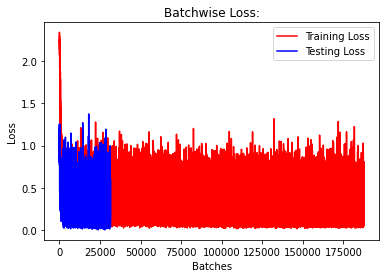

In [18]:
import matplotlib.pyplot as plt
plt.title("Batchwise Loss:")
plt.plot(AllBatchTrainLoss,color = 'r', label="Training Loss")
plt.plot(AllBatchValLoss,color = 'b', label="Testing Loss")
leg = plt.legend(loc='upper right')
plt.xlabel("Batches")
plt.ylabel("Loss")